In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
df = pd.read_parquet("https://osf.io/gk2ty/download")


In [3]:
df["Components"] = df["Task"].map(
    {
        "AND": 2,
        "ANDNOT": 3,
        "NAND": 1,
        "NOR": 4,
        "NOT": 1,
        "OR": 3,
        "ORNOT": 2,
        "XOR": 4,
        "EQUALS": 5,
    },
)


In [4]:
dfx = df.groupby(
    ["Generation Born", "Components", "Run ID", "Treatment"],
    observed=True,
).agg(
    **{
        "Delta Has Task": ("Delta Has Task", "first"),
        "SLIP_INSERTION_BOOL_MASK": ("SLIP_INSERTION_BOOL_MASK", "max"),
        "POINT_MUTATION_BOOL_MASK": ("POINT_MUTATION_BOOL_MASK", "max"),
    },
)


In [5]:
del df


In [6]:
dfy = dfx.reset_index()
dfy


,Generation Born,Components,Run ID,Treatment,Delta Has Task,SLIP_INSERTION_BOOL_MASK,POINT_MUTATION_BOOL_MASK
0,0,1,run_1530,Baseline-Treatment,0,False,False
1,0,1,run_1531,Baseline-Treatment,0,False,False
2,0,1,run_1532,Baseline-Treatment,0,False,False
3,0,1,run_1533,Baseline-Treatment,0,False,False
4,0,1,run_1534,Baseline-Treatment,0,False,False
...,...,...,...,...,...,...,...
102640,7765,1,run_1542,Baseline-Treatment,0,False,True
102641,7765,2,run_1542,Baseline-Treatment,0,False,True
102642,7765,3,run_1542,Baseline-Treatment,0,False,True
102643,7765,4,run_1542,Baseline-Treatment,0,False,True


teeplots/hue=delta-has-task+viz=barplot+x=components+y=slip-insertion-bool-mask+ext=.pdf


teeplots/hue=delta-has-task+viz=barplot+x=components+y=slip-insertion-bool-mask+ext=.png


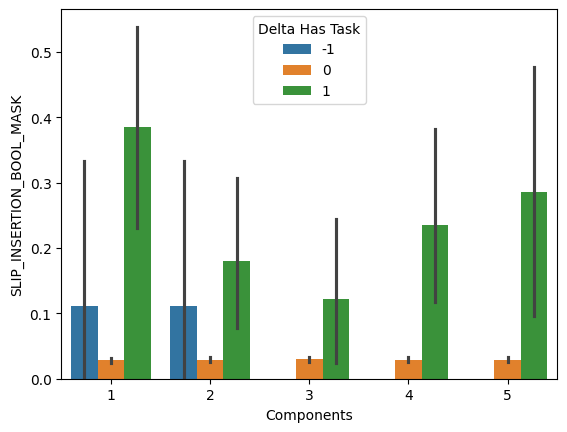

<Axes: xlabel='Components', ylabel='SLIP_INSERTION_BOOL_MASK'>

In [7]:
tp.tee(
    sns.barplot,
    data=dfy[
        dfy["Treatment"] == "Slip-duplicate"
    ].astype(
        {
            "Delta Has Task": "category",
            "SLIP_INSERTION_BOOL_MASK": "bool",
            "POINT_MUTATION_BOOL_MASK": "category",
        }
    ),
    x="Components",
    y="SLIP_INSERTION_BOOL_MASK",
    hue="Delta Has Task",
)


teeplots/col=components+hue=slip-insertion-bool-mask+kind=hist+multiple=dodge+stat=count+viz=displot+x=delta-has-task+ext=.pdf


teeplots/col=components+hue=slip-insertion-bool-mask+kind=hist+multiple=dodge+stat=count+viz=displot+x=delta-has-task+ext=.png


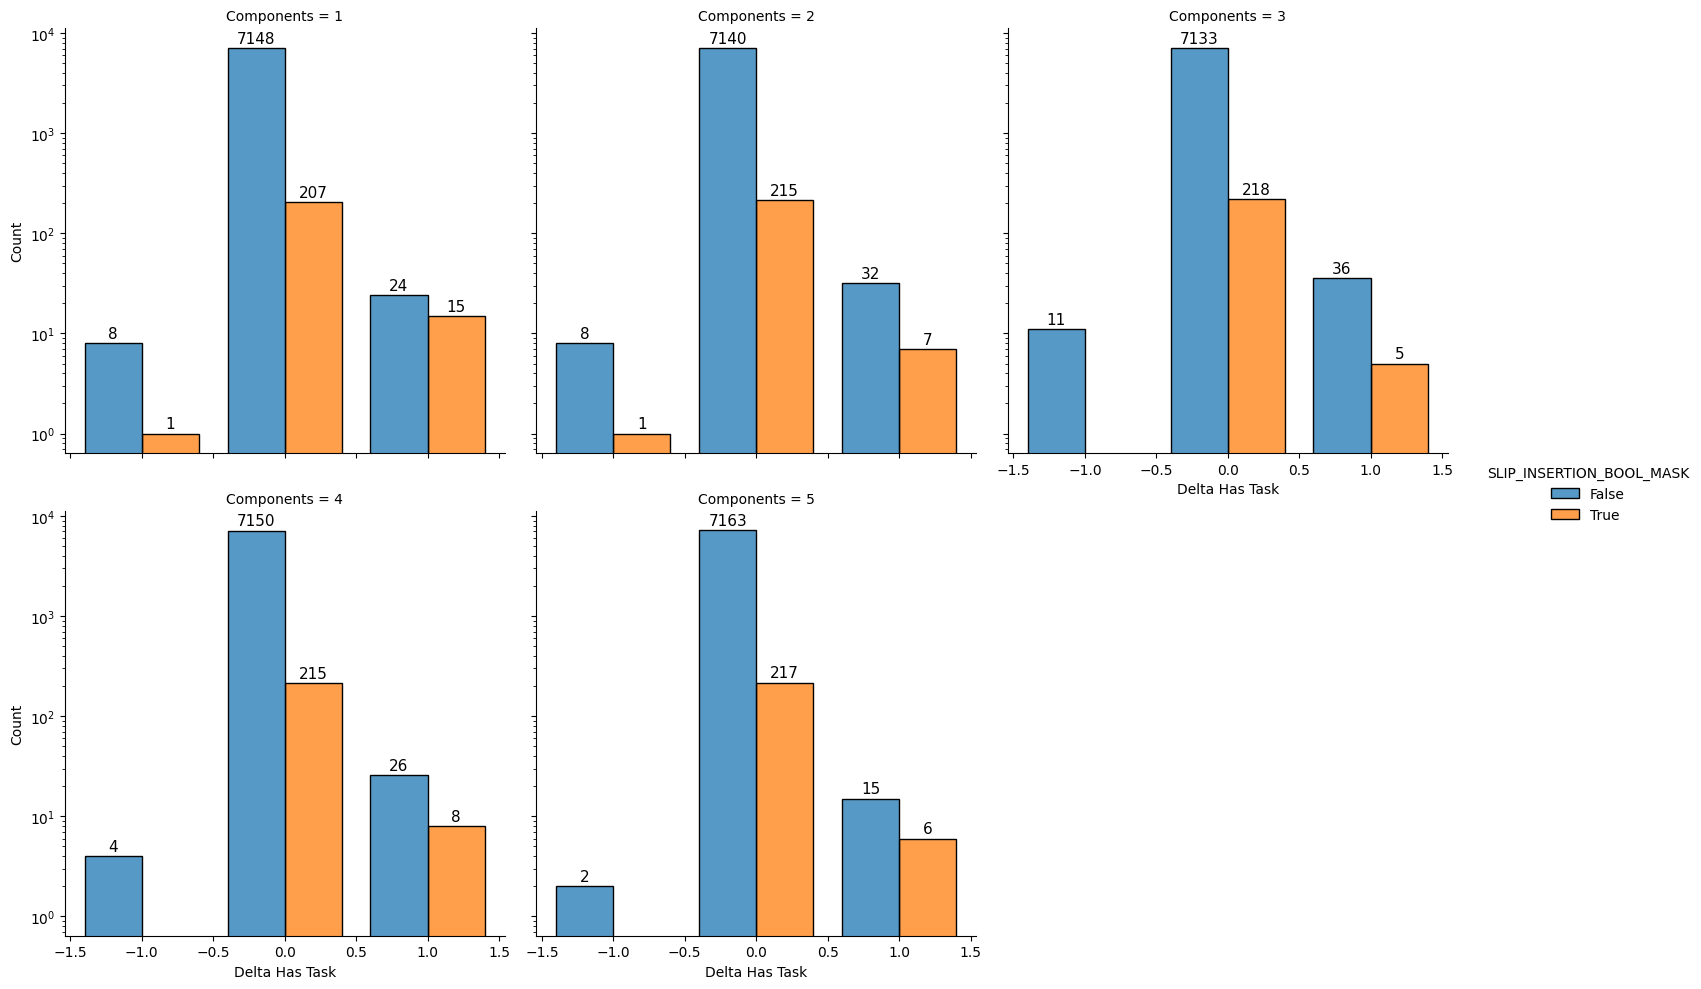

In [8]:
saveit, result = tp.tee(
    sns.displot,
    data=dfy[
        dfy["Treatment"] == "Slip-duplicate"
    ].astype(
        {
            "Delta Has Task": "category",
            "SLIP_INSERTION_BOOL_MASK": "category",
            "POINT_MUTATION_BOOL_MASK": "category",
        }
    ),
    col="Components",
    col_wrap=3,
    x="Delta Has Task",
    kind="hist",
    stat="count",
    multiple="dodge",
    hue="SLIP_INSERTION_BOOL_MASK",
    discrete=True,
    teeplot_callback = True,
    shrink=0.8,
)
plt.yscale('log')

# add count labels
# adapted from https://stackoverflow.com/a/55319634/17332200
for ax in result.axes.flat:
    for p in ax.patches:
        ax.annotate(
            text=f"{p.get_height():1.0f}",
            xy=(p.get_x() + p.get_width() / 2., p.get_height()),
            xycoords='data',
            ha='center',
            va='center',
            fontsize=11,
            color='black',
            xytext=(0,7),
            textcoords='offset points',
            clip_on=True,                   # <---  important
        )

saveit()


In [9]:
sns.displot(
    data=dfx.astype(
        {
            "Delta Has Task": "category",
            "SLIP_INSERTION_BOOL_MASK": "category",
            "POINT_MUTATION_BOOL_MASK": "category",
        }
    ),
    x="Delta Has Task",
    hue="SLIP_INSERTION_BOOL_MASK",
    col="Components",
    kind="hist",
    multiple="fill",
    row="Treatment",
    facet_kws=dict(margin_titles=True, ),
    aspect=0.8,
    height=2.5,
).set_titles(row_template="{row_name}", col_template="{col_name}")


In [10]:
g = sns.displot(
    data=dfx.astype(
        {
            "Delta Has Task": "category",
            "SLIP_INSERTION_BOOL_MASK": "category",
            "POINT_MUTATION_BOOL_MASK": "category",
        }
    ),
    x="Delta Has Task",
    hue="SLIP_INSERTION_BOOL_MASK",
    col="Components",
    kind="hist",
    multiple="dodge",
    row="Treatment",
    facet_kws=dict(margin_titles=True, ),
    aspect=0.8,
    height=2.5,
    shrink=0.8,
).set_titles(row_template="{row_name}", col_template="{col_name}")

for ax in g.axes.flat:
    ax.set_yscale("symlog")
